In [1]:
%load_ext autoreload
%autoreload 2

In [270]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from cv_helpers.utils import *

# Homography

In [3]:
pts = []
with open("./cv_helpers/tmp_file.txt", "r") as rf:
    line = rf.readline().strip()
    while len(line) > 0:
        pts.append(list(map(int, line.split(","))))
        line = rf.readline().strip()
        
pts = np.array(pts)
pts_src = pts[:4, :]
pts_dest = pts[4:, :]
pts_src, pts_dest

(array([[175, 243],
        [195, 296],
        [166, 369],
        [118, 317]]), array([[201, 303],
        [234, 344],
        [232, 409],
        [182, 389]]))

In [4]:
H, mask = cv2.findHomography(pts_src, pts_dest)

In [5]:
H

array([[ 1.48659631e+00,  1.26446038e+00, -2.14058534e+02],
       [-7.22061867e-01,  2.70682914e+00,  1.27789707e+00],
       [-1.11830758e-05,  3.12742987e-03,  1.00000000e+00]])

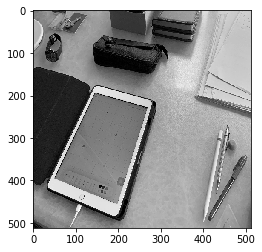

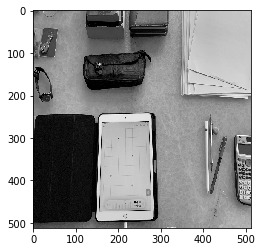

In [6]:
img1 = read_and_resize("./images/homography_1.png", if_display=True)
img2 = read_and_resize("./images/homography_2.png", if_display=True)

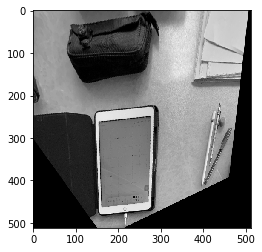

In [7]:
dest_warp = cv2.warpPerspective(img1, H, dsize=None)
plt.imshow(dest_warp, cmap="gray")

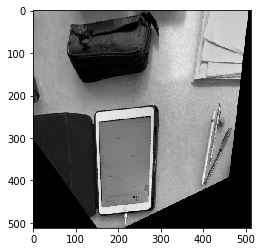

In [8]:
dest = warp_homography_remap(img1, H)
plt.imshow(dest, cmap="gray")

# SIFT & Homography

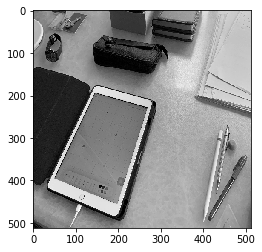

In [9]:
img1 = read_and_resize("./images/homography_1.png", if_display=True)

In [10]:
sift = cv2.xfeatures2d.SIFT_create()

In [11]:
kpts = sift.detect(img1)

In [12]:
kpt = kpts[0]
print(f"{kpt.angle}, {kpt.response}, {kpt.size}, {kpt.pt}")

258.65252685546875, 0.029803678393363953, 6.398563861846924, (10.551676750183105, 137.4343719482422)


In [13]:
kpts_new, descs = sift.compute(img1, kpts)

In [14]:
descs.shape

(330, 128)

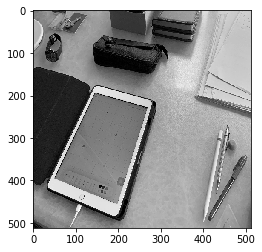

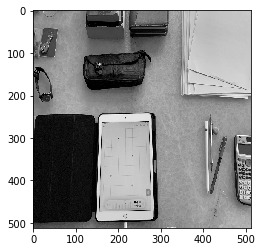

In [15]:
img1 = read_and_resize("./images/homography_1.png", if_display=True)
img2 = read_and_resize("./images/homography_2.png", if_display=True)

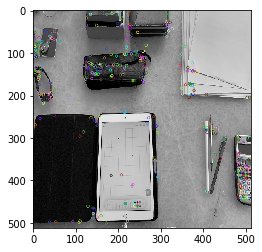

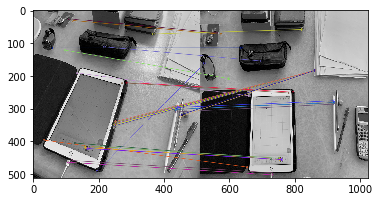

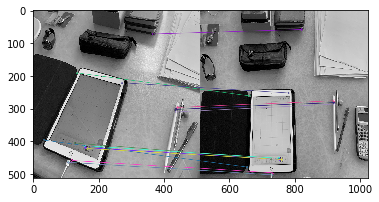

In [16]:
H = sift_homography(img1, img2, if_draw_keypoints=True, if_draw_matches=True)

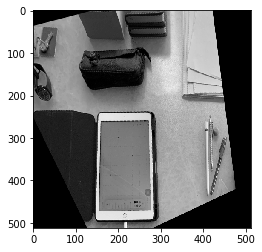

In [17]:
img2_warped = cv2.warpPerspective(img1, H, None)
plt.imshow(img2_warped, cmap="gray")

# Optical Flow

In [271]:
# frames = extract_first_frames("./images/shift.MOV")
frames = extract_first_frames("./images/zoom_in.MOV")
len(frames)

2

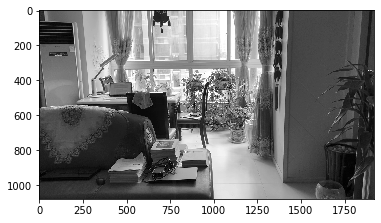

In [272]:
plt.imshow(frames[0], cmap="gray")

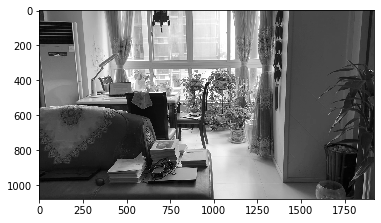

In [273]:
plt.imshow(frames[1], cmap="gray")

In [219]:
# img_paths = [f"./outputs/optical_orig_shift_{i}.png" for i in range(1, 3)]
# for i, frame in enumerate(frames):
#     cv2.imwrite(img_paths[i], frame)

In [274]:
img1, img2 = frames

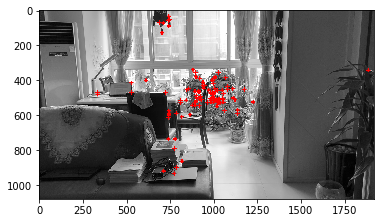

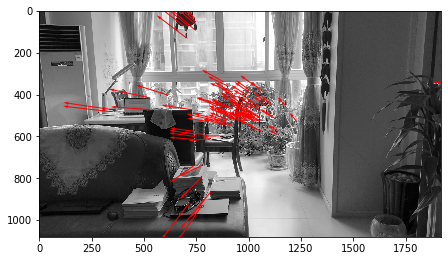

In [276]:
kpts, motion = compute_optical_flow(img1, img2, if_visualize=True)

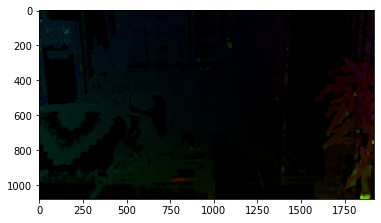

In [280]:
xx, yy, flow = compute_optical_flow(img1, img2, if_visualize=True,
                                   if_dense=True)

In [281]:
img2_warped = cv2.remap(img1, xx - flow[..., 0], yy - flow[..., 1],
                       interpolation=cv2.INTER_LINEAR)
cv2.imwrite("./outputs/img2_warped.png", img2_warped)

True